# Q3

A) We use given template to create our inputs:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


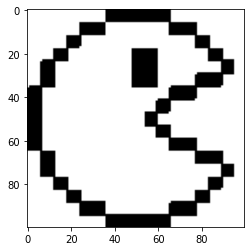

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


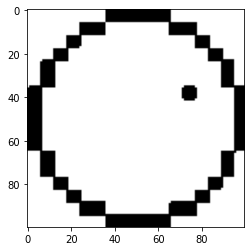

In [3]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Set the threshold value
threshold = 180

path = os.getcwd()

# path_train = path + '/pacman_Train.jpg'
# path_test  = path + '/pacman_Test.jpg'

path_train = '/content/drive/MyDrive/Colab Notebooks/Neural Network/pacman_Train.jpg'
path_test = '/content/drive/MyDrive/Colab Notebooks/Neural Network/pacman_Test.jpg'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x


# Read images
x = read_binarize_img(path_train)
y = read_binarize_img(path_test)

# Plot images
plt.imshow(np.repeat(x[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(y[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

B) Now we set weights:

In [4]:
x = x.tolist()
y = y.tolist()
net_x = []
net_y = []

for i in range(len(x)):
    net_x += x[i]
    net_y += y[i]

In [5]:
w = [[0 for i in range(len(net_x))] for j in range(len(net_x))]
for i in range(len(net_x)):
    for j in range(len(net_x)):
        inp = 2 * net_x[i] - 1
        out = 2 * net_x[j] - 1
        w[i][j] += inp * out

In [6]:
for i in range(len(w)):
    w[i][i] = 0

In [7]:
w = np.array(w)

C) we test our network with first picture

In [22]:
class DHN:
    def setWeights(self, weights):
        self.weights = weights
    def activate(self, inp):
        if inp >= 0:
            return 1
        return 0
    
    def updateInternalInd(self, external_input, internal_input, out_ind):
        new_out = external_input[out_ind]
        z = internal_input.dot(w[:, out_ind])
        new_out += z
        new_out = self.activate(new_out)
        internal_input[out_ind] = new_out
        return internal_input
    
    def calculateOutput(self, external_input, plot_out=True):
        external_input = np.array(external_input)
        internal_input = external_input.copy()
        orders = [j for j in range(len(external_input))]
        random.shuffle(orders)
        
        fig = plt.figure(num=None, figsize=(10, 5), dpi=120, facecolor='w', edgecolor='k')
        
        cnt = 1
        for i in range(len(orders)):
            ind = orders[i]

            internal_input = self.updateInternalInd(external_input, internal_input, ind)
            if plot_out:
                if i % 2000 == 1999:
                    plt.subplot(1, 5, cnt)
                    cnt += 1
                    plt.imshow(np.repeat(internal_input.reshape(100,100)[:,:,np.newaxis], repeats=3, axis=2))

        plt.tight_layout()
        plt.show()
        external_input = internal_input.copy()
        return external_input
    
    def printOutput(self, output):
        printable_output = output.reshape(100, 100)
        plt.imshow(np.repeat(printable_output[:,:,np.newaxis], repeats=3, axis=2))
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


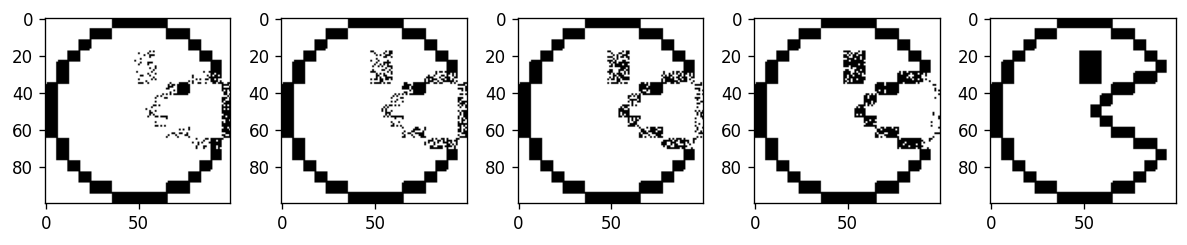

In [23]:
import random
myPacmanNet = DHN()
myPacmanNet.setWeights(w)

result = myPacmanNet.calculateOutput(net_y, plot_out=True)

D) we test out network with second picture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


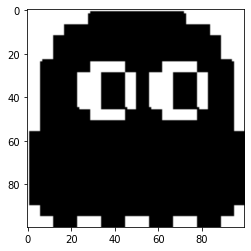

In [24]:
z = read_binarize_img('/content/drive/MyDrive/Colab Notebooks/Neural Network/ghost.jpg')
plt.imshow(np.repeat(z[:,:,np.newaxis], repeats=3, axis=2))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


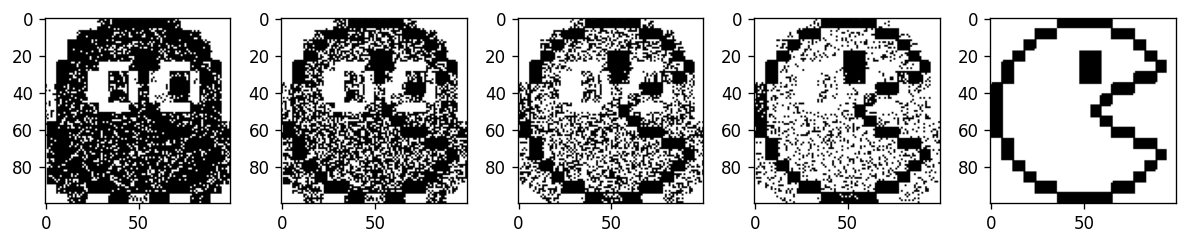

In [25]:
z = z.tolist()
net_z = []

for i in range(len(z)):
    net_z += z[i]
ghost_res = myPacmanNet.calculateOutput(net_z, plot_out=True)